In [1]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [2]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


In [3]:
sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


 10%|█         | 318/3065 [00:04<00:35, 77.58it/s]

Empty file: self.path = 'Corpus/Mazarinades/1201-1300/Moreau1240_GALL.xml'


100%|██████████| 3065/3065 [01:02<00:00, 49.20it/s]


In [4]:
import json

lst = [[files[i], e.header, e.texte] for i, e in enumerate(collection_textes)]

with open("headers.json", "w") as f:
    json.dump(lst, f, indent=4, ensure_ascii=False)

In [5]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(((txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
columns = ["n_pages", "hapax_ratio", "ttr", "lexicalite"])
concat = pd.concat([df0, df], axis=1)

In [6]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [7]:
concat

,form,genre,subject,handwritten_note,table_of_content,illustration,creation,change,titre,dates,subgenre,n_pages,hapax_ratio,ttr,lexicalite
0,vers,"[poésie, burlesque, satirique]","Conti, Armand de Bourbon, prince de, 1629-1666",False,False,False,1650-01-18,"{'@status': 'corrected', '@when': '2022-09-06'...",L'apologie de l'autruche en vers burlesques.,"[{'@type': 'file_creation', '@when': '2021-02-...",NaN,16686,0.141750,0.827138,0.398681
1,vers,"[pamphlet, satirique]",Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-09-23'...",A un ministre d’État sur les œufs,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,11342,0.136944,0.839521,0.390564
2,prose,nouvelles,"[Beaufort, François de Bourbon-Vendôme, duc de...",False,False,False,1652-07-30,"{'@status': 'corrected', '@when': '2022-03-24'...",L’abolition de M. le duc de Beaufort au parlem...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,14951,0.123279,0.744542,0.479540
3,"[vers, prose]",NaN,NaN,False,False,False,1649-03-30,"{'@status': 'corrected', '@when': '2022-03-24'...",Les acclamations de joie des bons Parisiens su...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,18069,0.164908,0.819169,0.354150
4,prose,articles,NaN,False,False,False,1649-01-30,"{'@status': 'corrected', '@when': '2022-10-25'...",L'accord passé entre les quatre empereurs de l...,"{'@type': 'file_creation', '@when': '2022-10-2...",NaN,14967,0.137410,0.799349,0.400631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,vers,pamphlet,Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Touche aux plumes vénales et ingrates de ce\n ...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,11319,0.160635,0.823216,0.323483
3060,prose,"[rhétorique délibérative, remontrances]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Très-humbles remontrances à Mademoiselle et à ...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,40139,0.120094,0.712455,0.480560
3061,prose,"[didactique, sermon]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-08'...",Troisième et dernier sermon de l’Eucharistie p...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,36404,0.122129,0.723588,0.462005
3062,prose,"[nouvelles, récit, discours adressé]",Emprisonnement des\n Princes,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Particularités (Les) de la détention des Princ...,"{'@type': 'file_creation', '@when': '2021-11-0...",NaN,27481,0.126477,0.706080,0.512162


In [8]:
concat.to_csv("stats.csv", sep=";")


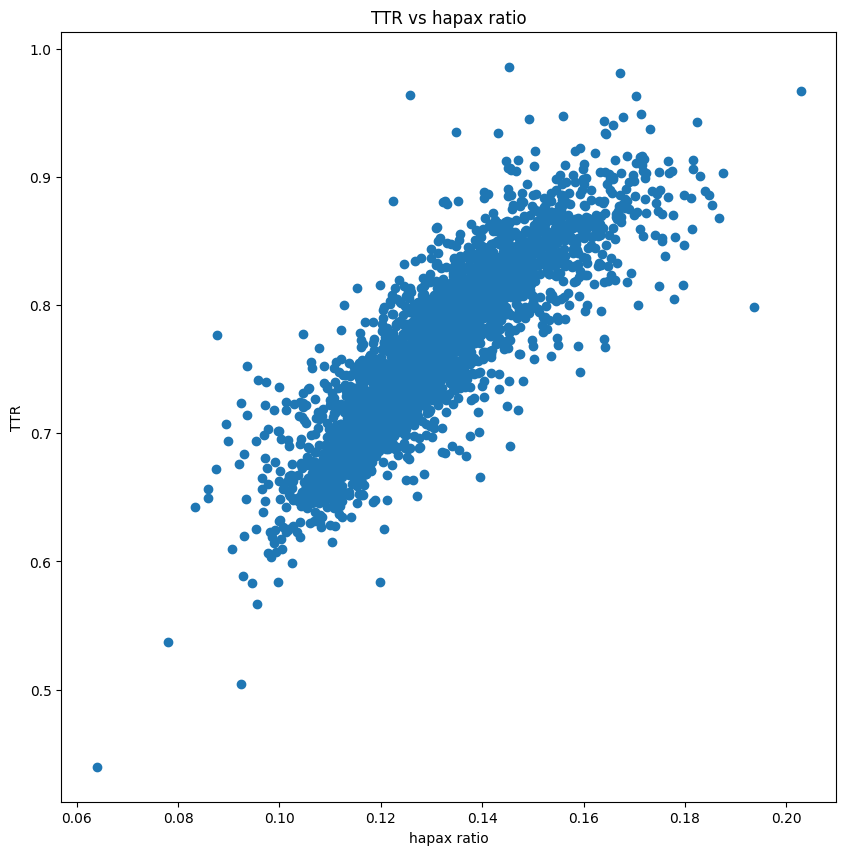

In [9]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

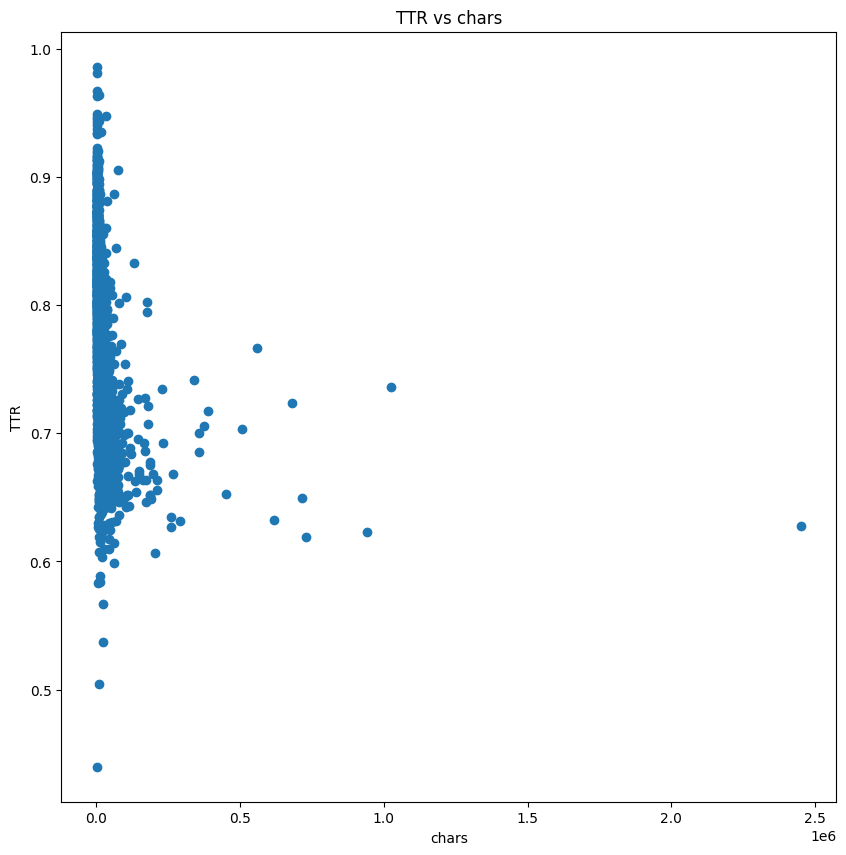

In [10]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

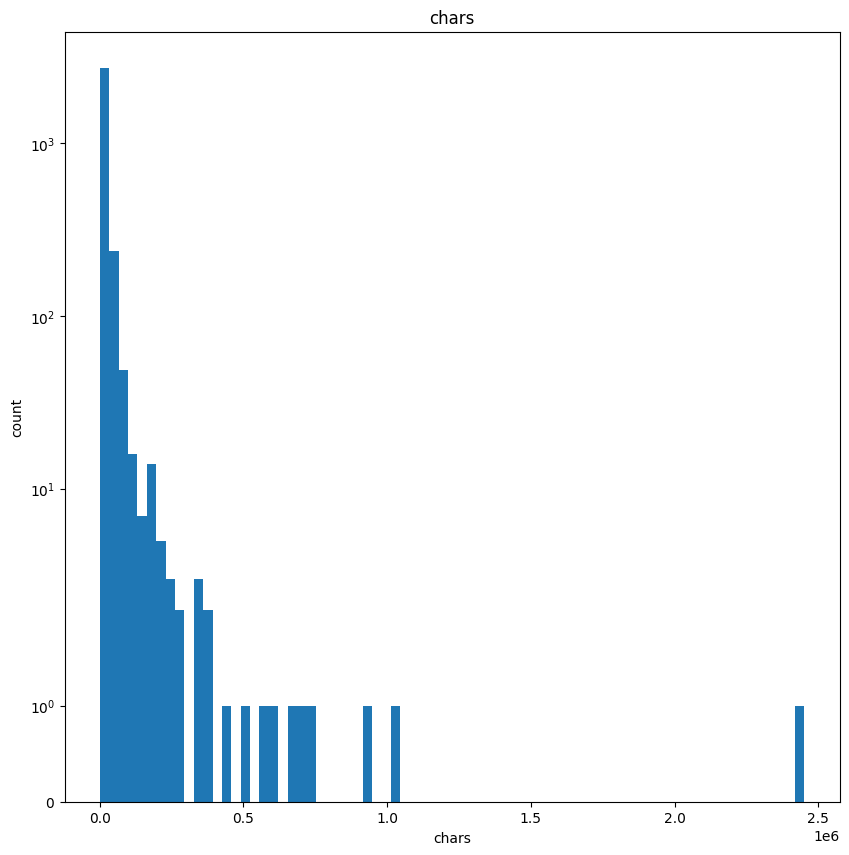

In [11]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

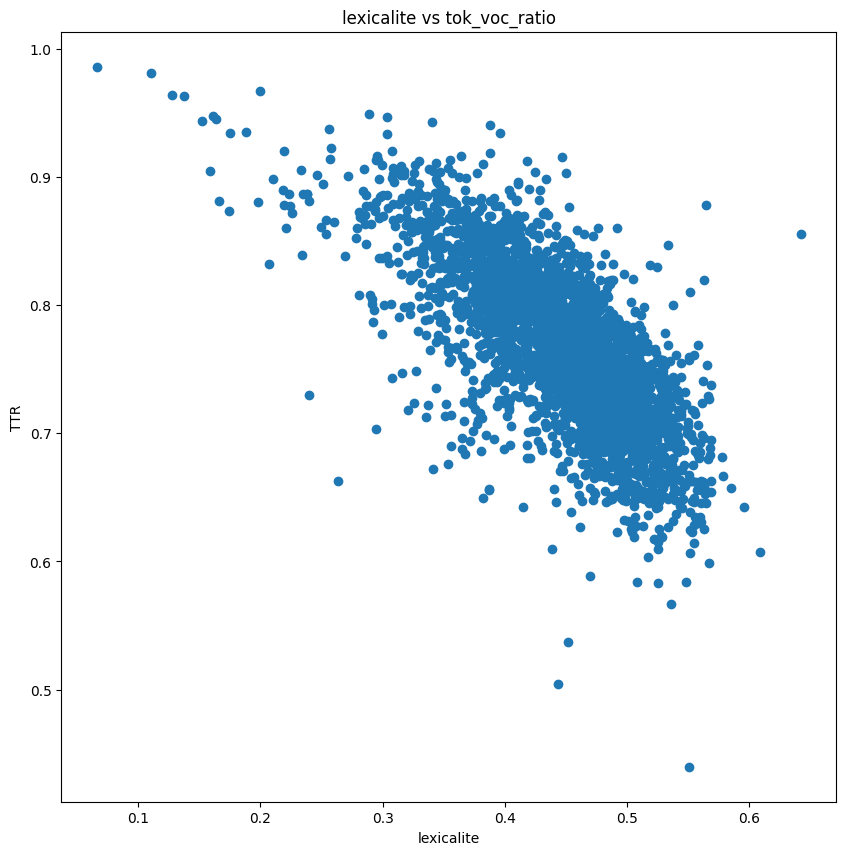

In [12]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [13]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [14]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-09-06', '@who': 'AB'},
 'creation': '1650-01-18',
 'dates': [{'#text': '16 février 2021',
            '@type': 'file_creation',
            '@when': '2021-02-16'},
           {'#text': '23 avril 2021',
            '@type': 'correction',
            '@when': '2021-04-23'}],
 'form': 'vers',
 'genre': ['poésie', 'burlesque', 'satirique'],
 'handwritten_note': False,
 'illustration': False,
 'subject': 'Conti, Armand de Bourbon, prince de, 1629-1666',
 'table_of_content': False,
 'titre': "L'apologie de l'autruche en vers burlesques."}


In [15]:
txt.ttr, txt.lexicalite

(0.8271376534773252, 0.3986806760765206)

In [16]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

vers: 0.819
prose: 0.753
('vers', 'prose'): 0.761
('prose', 'manifeste'): 0.713
('prose', 'récit'): 0.788


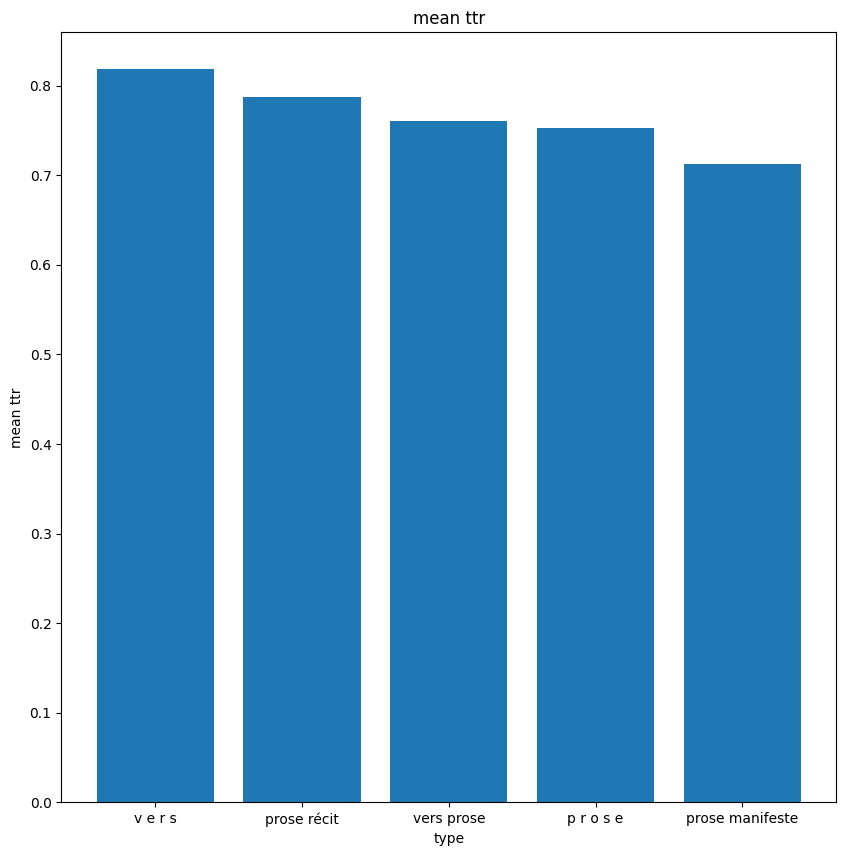

In [17]:
stats("ttr")


vers: 0.144
prose: 0.128
('vers', 'prose'): 0.132
('prose', 'manifeste'): 0.118
('prose', 'récit'): 0.124


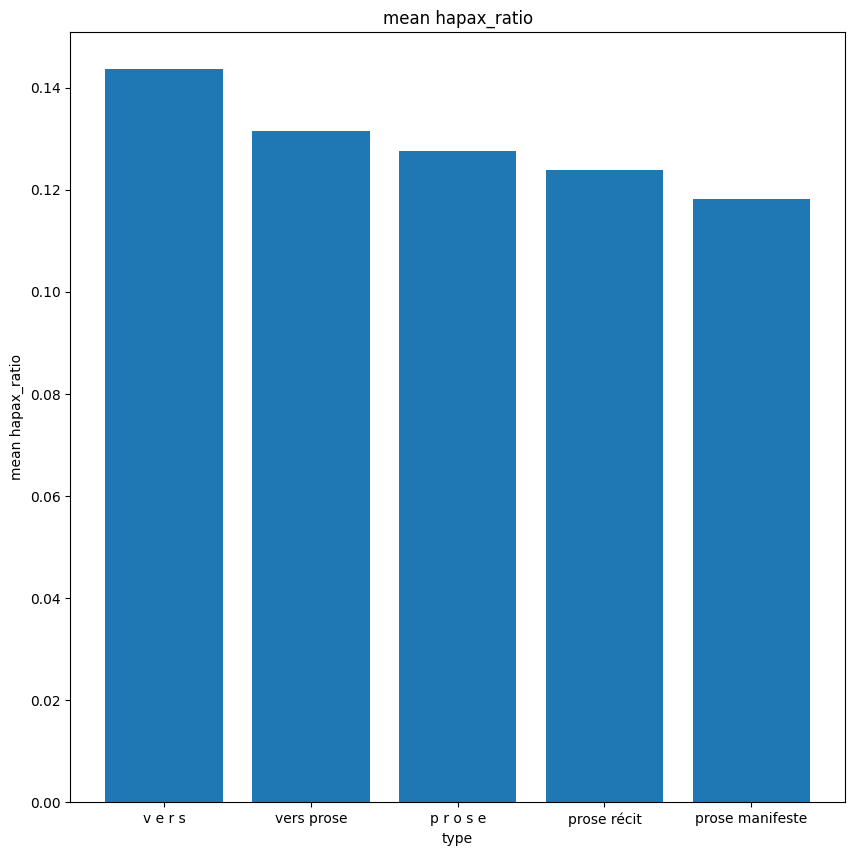

In [18]:
stats("hapax_ratio")

In [19]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1650-01-18: 0.137
1652-07-30: 0.132
1649-03-30: 0.131
1652-01-01: 0.130
1650-09-02: 0.131
1649-06-26: 0.131
1649-08-18: 0.131
1652-08-19: 0.131
1652-03-05: 0.129
1650-03-05: 0.138
1649-02-08: 0.133
1648-04: 0.124
1650-10-01: 0.131
00-00-0000: 0.134
1649-04-16: 0.137
1652-02-27: 0.130
1651-04-05: 0.123
1652-08-07: 0.129
1649-09-05: 0.134
1652-04-20: 0.131
1649-03-15: 0.132
1651-04-18: 0.122
1652-04-07: 0.132
1650-05-09: 0.121
1649-03-22: 0.130
1651-07-06: 0.128
1652-09-24: 0.129
1649-12-11: 0.133
1652-08-26: 0.128
1650-07-04: 0.132
1651-08-17: 0.124
1651-09-13: 0.122
1651-09-07: 0.127
1652-08-23: 0.141
1652-04-28: 0.126
1651-12-12: 0.137
1649-07-17: 0.133


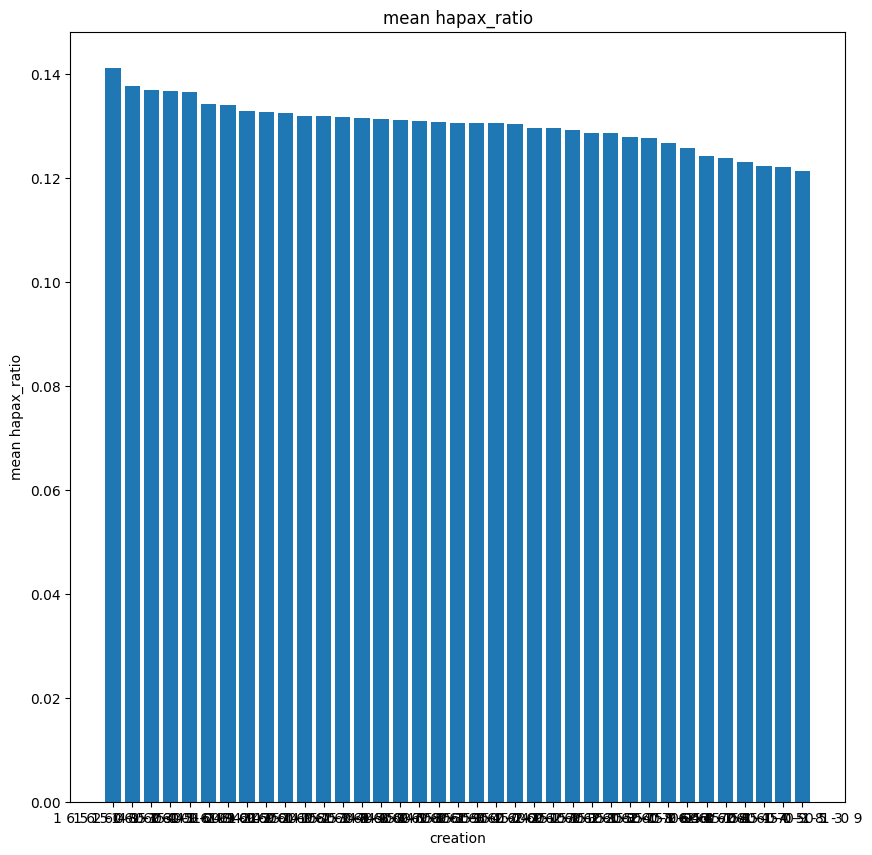

In [20]:
stats2("creation", "hapax_ratio")

1650-01-18: 0.784
1652-07-30: 0.755
1649-03-30: 0.769
1652-01-01: 0.762
1650-09-02: 0.755
1649-06-26: 0.767
1649-08-18: 0.770
1652-08-19: 0.756
1652-03-05: 0.752
1650-03-05: 0.795
1649-02-08: 0.762
1648-04: 0.742
1650-10-01: 0.764
00-00-0000: 0.783
1649-04-16: 0.792
1652-02-27: 0.762
1651-04-05: 0.719
1652-08-07: 0.751
1649-09-05: 0.778
1652-04-20: 0.762
1649-03-15: 0.766
1651-04-18: 0.723
1652-04-07: 0.767
1650-05-09: 0.720
1649-03-22: 0.763
1651-07-06: 0.753
1652-09-24: 0.757
1649-12-11: 0.767
1652-08-26: 0.751
1650-07-04: 0.763
1651-08-17: 0.744
1651-09-13: 0.723
1651-09-07: 0.746
1652-08-23: 0.789
1652-04-28: 0.740
1651-12-12: 0.792
1649-07-17: 0.772


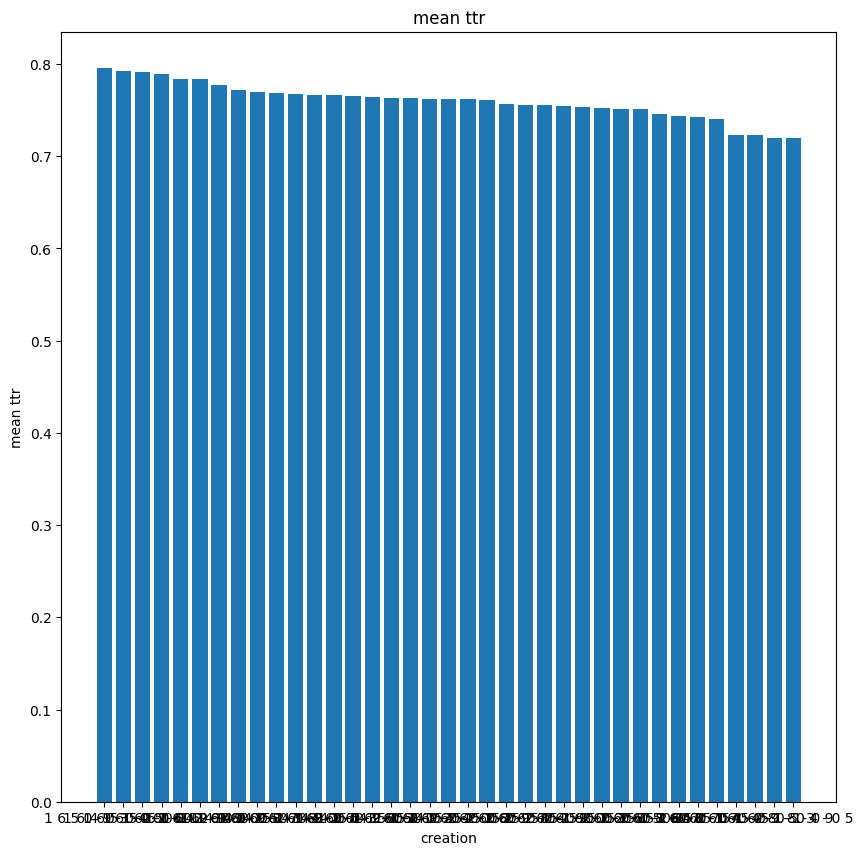

In [21]:
stats2("creation", "ttr")

False: 17017.976
True: 138041.917


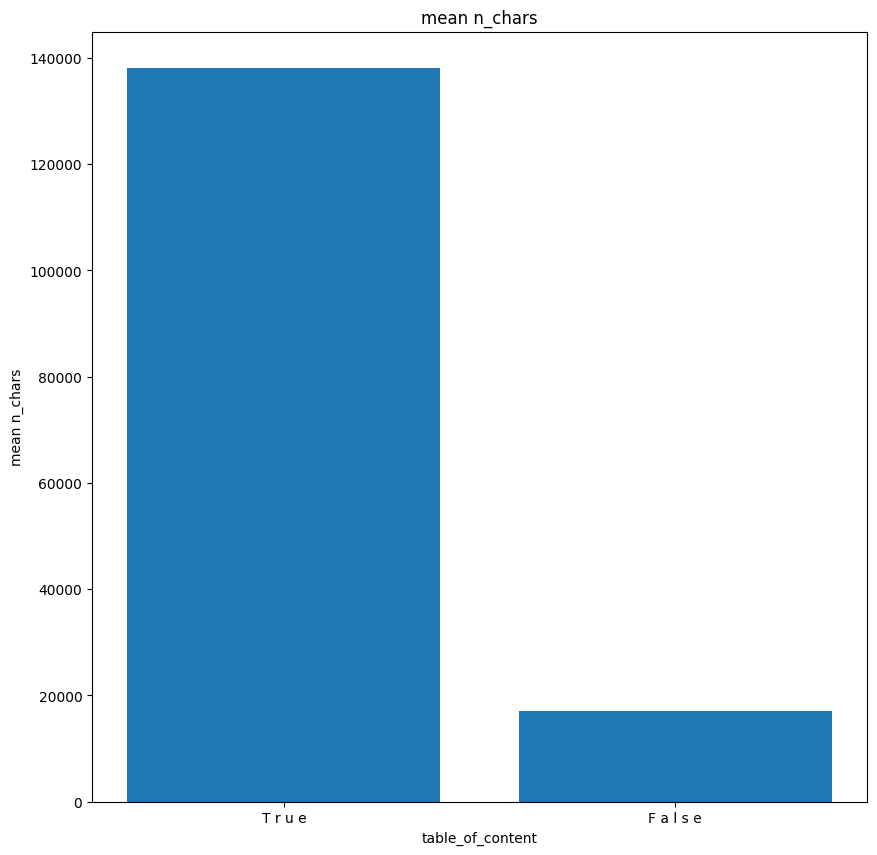

False: 0.767
True: 0.700


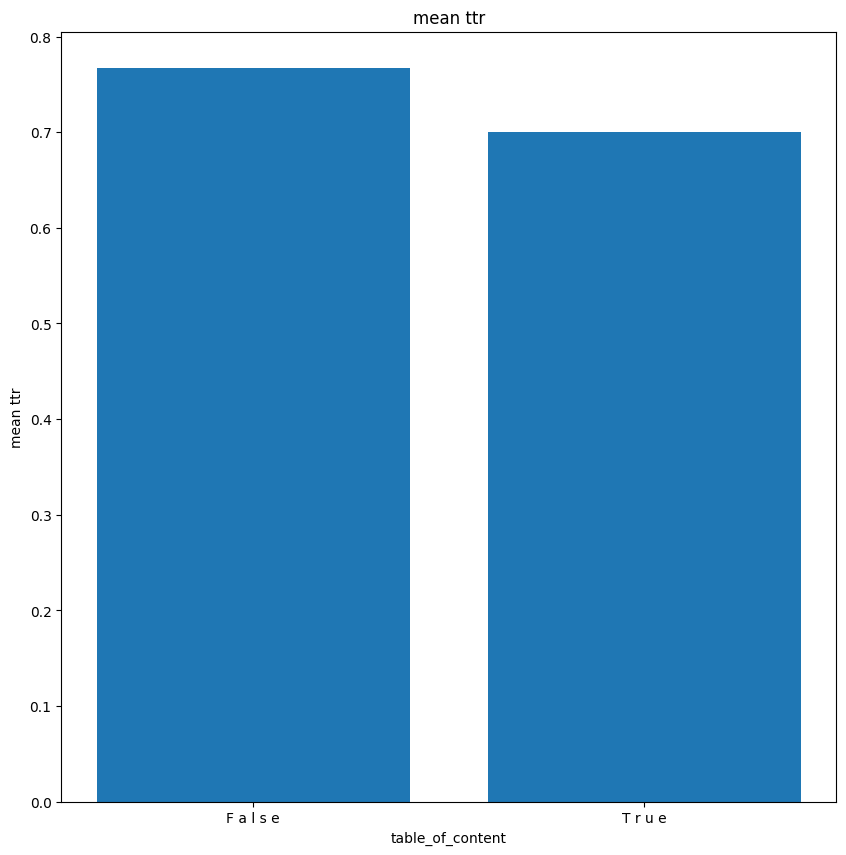

In [22]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [23]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [24]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




46370126 2847110 49217236 0.9421521761197642 0.05784782388023578


In [25]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [26]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [27]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.43985568162728583, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [28]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9859603415834419, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [29]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.06391675956893349, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [30]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.2028985507246377, 475)


{'form': 'prose',
 'subject': 'Paris (France)',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Le généreux prince aux Parisiens de mourir pour le\n          service du roi et de ne point souffrir le retour du cardinal Mazarin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [31]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.06577772953152893, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [32]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.6425953649748364, 1542)


{'form': 'prose',
 'genre': 'non renseigné',
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-13',
 'change': {'@status': 'corrected', '@when': '2022-07-11', '@who': 'MF'},
 'titre': 'Les profanations mazariniques, ou le Truchement de\n          Saint-Denys apportant des nouvelles de sa désolation, par le sieur de La Campie,\n          gentilhomme périgourdin.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'}}

In [33]:
collection_textes[1876].lexicalite


0.49022670025717696

In [34]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)

for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join(txt.pages))


paragraphes = []
temp = ""
for e in txt.split("\n\n"):
    if len(e) < 10 :
        continue
    temp += e
    if len(temp) > 2000:
        paragraphes.append(temp)
        temp = ""
